# Occupancy Grid Maps


## Mapping Task
Mappig task on three assumptions
1. Each cell is a Binary Random Variable that models the environment
2. World is static
3. Cells are independent

$$p(m|z_{1:t},x_{1:t}) = \prod_i p(m_i|z_{1:t},x_{1:t}))$$

Using Bayes rule + Markov Assumption ("If I know the state of a point in time, what happened in the past do not affect the future"), we can estimate the above to be
$$p(m_i|z_{1:t}, x_{1:t}) = \frac{p(m_i|z_t, x_t) p(z_t | x_t) p(m_i|z_{1:t-1}, x_{1:t-1})} {p(m_i) p(z_t|z_{1:t-1}, x_{1:t})}$$

By utilizing that it is a Binary Random variable we can do exactly the same for the opposite event and compute the ratio
$$\frac{p(m_i|z_{1:t} x_{1:t})}{p(-m_i|z_{1:t}, x_{1:t})} = \frac{p(m_i|z_t, x_t)}{1 - p(m_i|z_t, x_t)} \frac{p(m_i|z_{1:t-1}, x_{1:t-1})}{1 - p(m_i|z_{1:t-1}, x_{1:t-1})} \frac{1 - p(m_i)}{p(m_i)} $$

This is the three terms we want to use. 
1. **1st** term is called the inverse sensor model term. It uses current observations $z_t$
2. **2nd** term is a recursive term. Cell estimate using observations $z_{t-1}$
3. **3rd** term is the prior information term, the prior assumptions of occupancy

# Log-Odds
Using log-odds we can turn the product into a sum for efficieny. 

# Finally
In short, we solve for grid map occupancy with 
$$
l_{t,i} = \texttt{inv\_sensor\_model}(m_i,x_t,z_t)  + l_{t-1,i} - l_0
$$

# Exercise 3

## Occupancy grid mapping

The aim of this assignment is to implement a 2D occupancy grid mapping algorithm as described in the lecture. We provide data recorded by a robot using a 2D laser scanner in an indoor environment. 

The raw data is arranged in the following manner:

- `poses.data`: contains the **known** robot poses as it moves around the environment. Each line corresponds to the pose of the robot at a time instant

- `ranges.data`: contains 2d laser range measurements recorded by the robot. Each line corresponds to the range measurements taken from the corresponding robot poses.

---

### Log odds to probability

The occupancy calculations are usually performed using the log odds. We will need to convert between log odds and probabilities in this exercise. Implement the `logodds2prob` and `prob2logodds` functions. Verify that the conversion functions are correct for some test input. **[2.0]**

In [5]:
#pip install bresenham

Note: you may need to restart the kernel to use updated packages.


In [101]:
import math
from src.ex3 import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Computes the probability from log-odds form
def logodds2prob(l):
    return 1-(1/(1+np.exp(l)))

# Computes the log-odds from probability
def prob2logodds(p):
    return np.log(p/(1-p))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
### Inverse sensor model

The occupancy grid mapping relies on as inverse sensor model to update the occupancy of a cell in the grid. For this exercise, we consider a simple sensor model, where the occupancy of cell $m_i$ is $P_{occ}$ if the measurement $z_t$ falls in that cell, otherwise the occupancy is $P_{free}$. 

However, if the cell $m_i$ is not in the perception field, the occupancy will be $P_{prior}$.

Use the  following probabilities in the implementation:
$$P_{occ} = 0.9, P_{free} = 0.35, P_{prior} = 0.5 $$

Implement the inverse sensor model function and verify that it is correct for some test input. **[2.0]**

In [102]:
cell = [1, 1]
endpoint = [7,9]
prob_occ = 0.9
prob_free = 0.35

def inv_sensor_model(cell, endpoint, prob_occ, prob_free):
    line = bresenham(cell[0], cell[1], endpoint[0], endpoint[1])
    p_values = [0] * len(line)
    for i in range(len(line) - 1):
        p_values[i] = prob_free
    
    p_values[-1] = prob_occ
    inv_sensor_model = np.zeros((len(line),3))
    for i, l in enumerate(line):
        inv_sensor_model[i] = [*l, p_values[i]]

    return inv_sensor_model

test = inv_sensor_model(cell, endpoint, prob_occ, prob_free)
print(test)


[[1.   1.   0.35]
 [2.   2.   0.35]
 [3.   3.   0.35]
 [3.   4.   0.35]
 [4.   5.   0.35]
 [5.   6.   0.35]
 [6.   7.   0.35]
 [6.   8.   0.35]
 [7.   9.   0.9 ]]


---
### Occupancy grid mapping algorithm:

Implement the occupancy grid mapping algorithm as described in lecture slides. 

We provide some functions to make the implemntation easier.

- `ranges2cells` converts the raw measurements acquired by the robot (*ranges_raw*) into the correspoding cells of the gridmap.
- `poses2cells` converts the raw poses of the robot (*poses_raw*) into the correspoding cells of the gridmap.
- `bresenham` returns all the cells along a straigh line between two points in the gridmap.

Other parameters you may need in the implemntation are provided below.

Implement the `grid_mapping_with_known_poses` functionn and compute the resulting occupancy grid map using all the measurements provided in the data.

Plot the final occupancy gridmap using the `plot_gridmap` function. **[6.0]**


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Pose: 10
Pose: 20
Pose: 30
Pose: 40
Pose: 50
Pose: 60
Pose: 70
Pose: 80
Pose: 90
Pose: 100
Pose: 110
Pose: 120
Pose: 130
Pose: 140
Pose: 150
Pose: 160
Pose: 170
Pose: 180
Pose: 190
Pose: 200
Pose: 210
Pose: 220
Pose: 230
Pose: 240
Pose: 250
Pose: 260
Pose: 270
Pose: 280
Pose: 290
Pose: 300
Pose: 310
Pose: 320
Pose: 330
Pose: 340
Pose: 350
Pose: 360
Pose: 370
Pose: 380
Pose: 390
Pose: 400
Pose: 410
Pose: 420
Pose: 430
Pose: 440
Pose: 450
Pose: 460
Pose: 470
Pose: 480
Pose: 490
Pose: 500
Pose: 510
Pose: 520
Pose: 530
Pose: 540
Pose: 550
Pose: 560
Pose: 570
Pose: 580
Pose: 590
Pose: 600
Pose: 610
Pose: 620
Pose: 630
Pose: 640
Pose: 650
Pose: 660
Pose: 670
Pose: 680


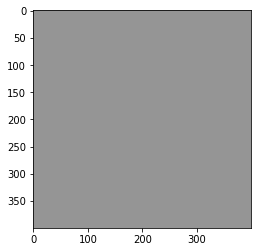

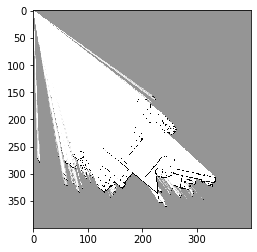

In [100]:
from src.ex3 import *
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

map_size = 100
map_res = 0.25

prior = 0.50
prob_occ = 0.90
prob_free = 0.35

# load data
ranges_raw = np.loadtxt("data/grid_mapping/ranges.data", delimiter=',', dtype='float')
poses_raw = np.loadtxt("data/grid_mapping/poses.data", delimiter=',', dtype='float')

# initialize gridmap
occ_gridmap = init_gridmap(map_size, map_res)+prior
plot_gridmap(occ_gridmap)

updated_gridmap = grid_mapping_with_known_poses(ranges_raw, poses_raw, occ_gridmap, map_res, prob_occ, prob_free, prior)

plot_gridmap(updated_gridmap)

